<a href="https://colab.research.google.com/github/feliperichard/diplodatos2021-datasets/blob/main/diplodatos2021-datasets/TP2_Analisis_y_Curacion/tp2_analisis_y_curacion_Grupo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Trabajo Práctico N°2: de Analisis + Curación

# Trabajo Práctico N°2: Análisis Exploratorio y Curación de Datos

## Introducción

Este trabajo práctico intenta continúa la exploración de los datasets planteados en el [primer trabajo práctico](https://github.com/luisdvlpr/diplodatos2021-datasets/blob/main/TP1_Analisis_y_Visualizacion/enunciado_tp1_analisis_y_visualizacion.ipynb)

En el primer práctico pudimos notar algunas características propias de las series temporales y en particular del dominio del comportamiento de un ecommerce genérico. Muchas de ellas son __series no estacionarias__, ya que la caracterización de estas distribuciones ( media, varianza ) cambian a través del tiempo y se observan ademas alguna tendencias. __Por otra parte se se distinguen patrones de estacionalidad, por ej. semanal__. 

Lo anterior trae __consecuencias__ directas en la selección de las metodologías adecuadas para abordar las problemáticas de tratamiento de __valores faltantes__, detección de __outliers__ y la construcción de __modelos predictivos__.

Por otra parte, debe notarse que el tamaño de las economías de cada pais y la adopción de los hábitos de uso de estas plataformas en cada uno de ellos hace que el uso de cantidad de sesiones no sea una medida adecuada para compararles. Entonces, el análisis de estas series se centra por lo general en el cambio porcentual de los precios en vez del cambio en los valores absolutos. Esto resulta en que en vez de modelar los índices originales, previamente se habitúa realizar una __transformación logarítmica__ o trabajar con la __tasa de conversión__ a fin de expresarlos en un __único métrica que les caracterice__ para evitar distorsiones debidas a los tamaños de sus economías y hábitos de uso.


### Carga del dataset

In [ ]:

import numpy as np
import pandas as pd
 
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# some config
plt.rcParams['figure.figsize'] = (12, 9)

In [ ]:
url = "https://raw.githubusercontent.com/luisepifanio/diplodatos2021-datasets/main/TP2_Analisis_y_Curacion/datasets/traffic_AR_CL_UY.csv"
td = pd.read_csv(url,usecols = ["Fecha", "flow", "Site", "Device", "Loading", "Shipping", "Payments", "Review", "Congrats"], 
    parse_dates=True
)
ColumnasNum =["Loading","Shipping",	"Payments","Review","Congrats"]

td
#hacemos una copia del dataset original para compararlo al final del ejercicio
td_original = td

# Consignas del trabajo práctico N°2

El objetivo general del práctico es realizar algunas tareas de __preprocesamiento__ de los datos y luego __analizar las series obtenidas__ de dicho preprocesamiento en forma similar a la empleada en el TP1.

Se proponen las siguientes actividades orientadoras, sin perjuicio de que se puedan incorporar análisis adicionales:

#### Tratamiento de faltantes

- Identificar valores perdidos, huecos en los datos ej: aquellos días para los que no hubo datos

- Identificar aquellos valores "sospechosos", debido al dropout ( o perdida de sesiones) a medidas que avanzas en 
  las pantallas la cantidad de sesiones en la pantalla posterior es menor/igual al de su predecesora

- Imputar los valores sospechoso con otros que tengan sentido dentro del dominio segun lo explicado en el punto anterior

- Imputar los faltantes debidos a fallas de medición usando un algoritmo adecuado para series temporales, 
  por ejemplo splines, interpolaciones, valores de medias/medianas móviles por ventana de tiempo

- Comparar los valores originales vs los imputados y juzgue si los valores se mantienen dentro de parametros aceptables, ¿Como justificaría que dichos valores imputados tienen sentido en su analisis?


#### Transformaciones

Obtener las siguientes series transformadas:

- Los logaritmos naturales de los índices. 

- Las tasas de conversion.

#### Exploración de las series transformadas

Reutilizar parte del código del TP1 para analizar las series transformadas. En una primera etapa se puede trabajar con solo una de las series resultantes de tomar logaritmo natural y una serie de tasa de conversión.

- Analizar las distribuciones por medio de gráficos y medidas de estadística descriptiva.

- Dichas distribuciones, ¿se mantienen relativamente inalteradas en el tiempo?

- ¿Hay outliers?

- Estudiar la evolución temporal de las series. ¿En qué sentido tienden a moverse? ¿Tienden a moverse en forma conjunta?  ¿Siempre se da dicho patrón? ¿Hay períodos de crisis? En caso de que existan crisis / eventos , ¿Son globales o propias de sites individuales? 

- To Be defined: De ser definido, podemos establecer un grupo de control versus ls valores imputados y establecer 
  que tan buenos resultaron los métodos ejecutados para rellenar los valores respecto de los deseables

#### Opcional
- Graficar e interpretar las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF).
- Explorar la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles.

## Fecha de entrega

- __Versión preliminar: 03/07__ 

- __Version final: 07/07__

## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo puede orientarse para un público técnico pero que desconoce los aspectos propios del problema como sus compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se explique un análisis escrito suficientemente detallado de los resultados. 


## Referencias adicionales

[pandas e interpolate ]( https://pandas.pydata.org/docs/reference/api/pandas.Series.interpolate.html)

[Manejo de valores perdidos]( https://pandas-docs.github.io/pandas-docs-travis/user_guide/missing_data.html )

https://towardsdatascience.com/a-practical-guide-on-missing-values-with-pandas-8fb3e0b46c24

https://towardsdatascience.com/handling-missing-values-the-exclusive-pythonic-guide-9aa883835655


# Resolución trabajo práctico número 2

###Identificación de datos faltantes


In [ ]:
#Contamos los registros NAN
td.isna().sum()

Fecha        0
flow         0
Site         0
Device       0
Loading      0
Shipping     8
Payments     0
Review      12
Congrats     0
dtype: int64

In [ ]:
#Contamos los registros con ceros
Records0 = td == 0
Records0.sum()

Fecha          0
flow           0
Site           0
Device         0
Loading     1027
Shipping      24
Payments      24
Review        24
Congrats      24
dtype: int64

In [ ]:
#Imputamos los cero como NAN para hacer las imputaciones todas juntas despues
td = td.replace(0,np.nan)
td.isna().sum()

Fecha          0
flow           0
Site           0
Device         0
Loading     1027
Shipping      32
Payments      24
Review        36
Congrats      24
dtype: int64

In [ ]:
#Identificamos las fechas en las que faltan datos
Numeric_Cols = ["Loading","Shipping", "Payments","Review","Congrats"]
td["NAN"] = np.where(np.any(np.isnan(td[Numeric_Cols]),axis=1), 1, 0)
nr=td["NAN"].sum()
print("Registros con datos faltantes",nr)


#Ver https://github.com/luisdvlpr/diplodatos2021-datasets/blob/main/TP2_Analisis_y_Curacion/0.1_traffic_cleaning.ipynb



Registros con datos faltantes 1041


In [ ]:
td_NAN = td.loc[td["NAN"]==1]
n= td_NAN["Fecha"].nunique()
print("Fechas con datos faltantes ",n)

Fechas con datos faltantes  252


###Identificar Valores Sospechos

Identificamos  los valores valores faltantes concluyendo que la mayoría está en el flow cart. Entenemos que por alguna razón de negocios los datos no se estaban colectando correctamente o este paso directamente no era parte de la definición del proceso para el flujo cart

In [ ]:
#Contamos los NAN en Loading por flow
td_cart = td.loc[td["flow"]=="cart"]
td_direct = td.loc[td["flow"]=="direct"]
print("valores falantes en cart ",td_cart['Loading'].isna().sum())
print("valores falantes en direct ",td_direct['Loading'].isna().sum())

valores falantes en cart  995
valores falantes en direct  32


#### Imputación de valores faltantes en Loading

Puede apreciarse abajo que no hay datos hasta de Loading hasta el mes de noviembre. Por lo tanto vamos a aplicar un procedimiento distinto que con el resto de los valores

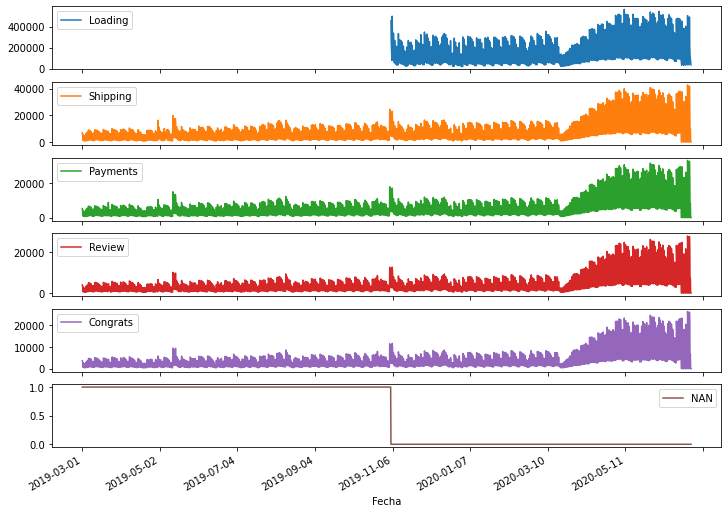

In [ ]:
td_cart.plot(x="Fecha",subplots=True)
plt.legend(loc='best')

Calculamos la columna de conversión entre Shipping y Loading que es lo que nos servirá posteriormente para la imputación

In [ ]:
td["Conv_Loading"] = td['Shipping']/td["Loading"]


Al abrir la información por Site notamos que el flow Cart no estaba disponible en el site MLU. Para el caso de MLC hay solo 12 casos que se entiende que son outliers. Probablemente sean casos de test o clientes que correspondían a Argentina y fueron registrados como MLC. Por lo que vamos a eliminar estos registros para no afectar los registros de Chile con estos valores

In [ ]:
pd.crosstab(index=[td["Site"],td["flow"]], columns=td["Device"],values=td["Conv_Loading"],aggfunc=np.count_nonzero).round(2)


Device       Android  Desktop  Mobile    iOS
Site flow                                   
MLA  cart      488.0    488.0   487.0  488.0
     direct    488.0    488.0   487.0  488.0
MLC  cart        NaN      6.0     6.0    NaN
     direct    461.0    488.0   488.0  461.0
MLU  direct    461.0    487.0   487.0  461.0

En esta tabla podemos ver que que no podemos imputar por la media simple ya que las distribuciones según el site son significativas

In [ ]:
pd.crosstab(index=[td["Site"]], columns=td["Device"],values=td["Conv_Loading"],aggfunc=np.mean).round(2)

Device,Android,Desktop,Mobile,iOS
Site,,,,
MLA,0.65,0.65,0.64,0.64
MLC,1.00,0.98,0.98,0.97
MLU,1.00,0.99,0.98,0.97


Dado que el  flow "cart" tiene un índice de converisión muy bajo en esta etapa por lo que se hace necesario graficar e imputar los dos flow en forma separada. En este gráfico puede apreciarse la diferencia entre ambas distribuciones

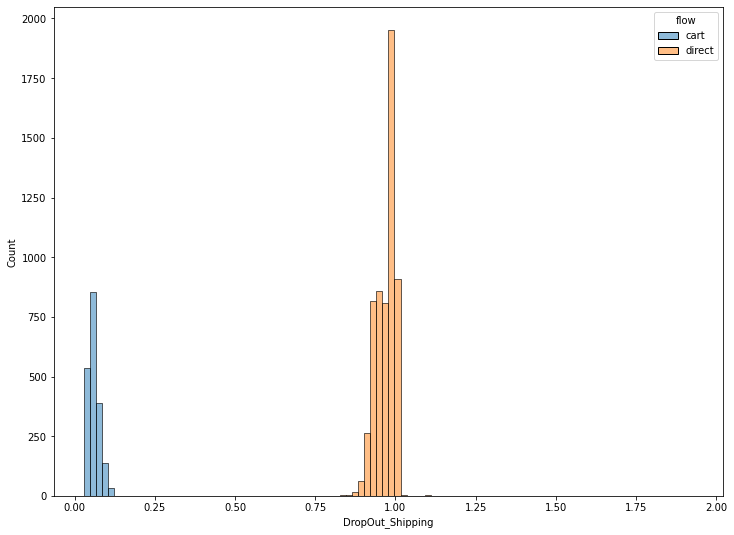

In [ ]:
import seaborn as sns
#Distribución
sns.histplot(td_Conversion,x="DropOut_Shipping", hue="flow", bins=100)



Calculamos el coeficiente de correlación para determinar si es posible imputar según la proporción de Loading/Shippfing. Podemos ver que hay una correlación del 0.93 por lo que parece razonable utilizarla como base de distribución

In [ ]:

td_cart.corr()

,Loading,Shipping,Payments,Review,Congrats,NAN
Loading,1.000000,0.931020,0.903812,0.866509,0.855025,NaN
Shipping,0.931020,1.000000,0.997078,0.985181,0.980317,-0.304432
Payments,0.903812,0.997078,1.000000,0.994960,0.991881,-0.316228
Review,0.866509,0.985181,0.994960,1.000000,0.999582,-0.336577
Congrats,0.855025,0.980317,0.991881,0.999582,1.000000,-0.338887
NAN,NaN,-0.304432,-0.316228,-0.336577,-0.338887,1.000000


In [ ]:
#Calculamos las medias para cada Device
con_and = td.loc[(td["flow"]=="cart") & (td["Device"]=="Android"),"Conv_Loading"].mean()
con_des = td.loc[(td["flow"]=="cart") & (td["Device"]=="Desktop"),"Conv_Loading"].mean()
con_mob = td.loc[(td["flow"]=="cart") & (td["Device"]=="Mobile"),"Conv_Loading"].mean()
con_ios = td.loc[(td["flow"]=="cart") & (td["Device"]=="iOS"),"Conv_Loading"].mean()

In [ ]:
#Imputamos según las medias
td.loc[(td['Loading'].isna()) & (td["flow"]=="cart") & (td["Device"]=="Android"),["Loading"]]=round(td["Shipping"]/con_and,0)
td.loc[(td['Loading'].isna()) & (td["flow"]=="cart") & (td["Device"]=="Desktop"),["Loading"]]=round(td["Shipping"]/con_des,0)
td.loc[(td['Loading'].isna()) & (td["flow"]=="cart") & (td["Device"]=="Mobile"),["Loading"]]=round(td["Shipping"]/con_mob,0)
td.loc[(td['Loading'].isna()) & (td["flow"]=="cart") & (td["Device"]=="iOS"),["Loading"]]=round(td["Shipping"]/con_ios,0)




In [ ]:
#### Tal como definimos anteriormente vamos a eliminar los valores de cart en MLC 

index_names = td[ (td['Site'] == "MLC") & (td['flow'] == "cart")].index
td.drop(index_names, inplace = True)
index_names
len(td)

7696

Contamos los valores después de la imputación y graficamos nuevamente para mostrar los valores de loading

In [ ]:
td.isna().sum()

Fecha              0
flow               0
Site               0
Device             0
Loading           34
Shipping          32
Payments          24
Review            36
Congrats          24
NAN                0
Conv_Loading    1033
dtype: int64

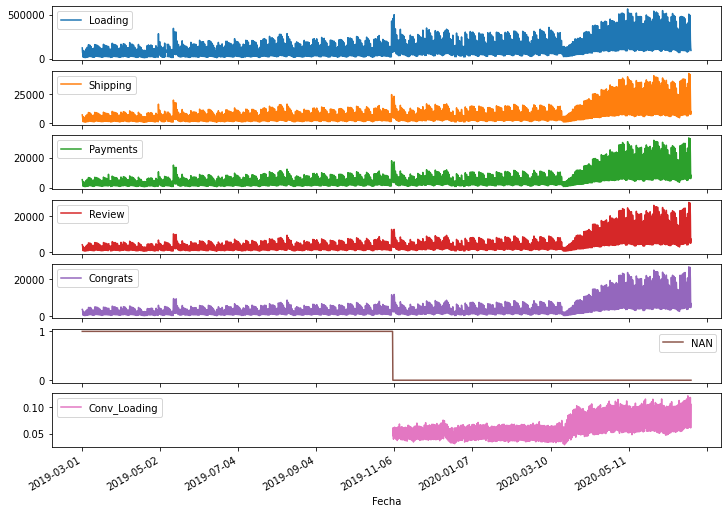

In [ ]:
td_cart = td.loc[td["flow"]=="cart"]
td_cart.plot(x="Fecha",subplots=True)
plt.legend(loc='best')

#### Imputación de Valores en base a coeficientes de conversión

En esta etapa vamos a detectar aquellos regístros anómalos. Por regla general determinamos en el funel de conversión la cantidad de usuarios en una etapa anterior no puede ser menor que la siguiente. Por ejemplo, no podríamos tener más usuarios en Shipping que en loading. El coeficiente entre la etapa n/etapa n+1 siempre debería estar entre 0 y 1 caso contrario no se cumple la regla de negocios y estaríamos ante una anomalía

In [ ]:
td["DropOut_Shipping"]= td["Shipping"]/td["Loading"]
td["DropOut_Payments"]= td["Payments"]/td["Shipping"]
td["DropOut_Review"]= td["Review"]/td["Payments"]
td["DropOut_Congrats"]= td["Congrats"]/td["Review"]

In [ ]:
td_Conversion = td.loc[:,["Fecha","flow","DropOut_Shipping","DropOut_Payments","DropOut_Review","DropOut_Congrats"]]
td_Conversion.set_index("Fecha")


,flow,DropOut_Shipping,DropOut_Payments,DropOut_Review,DropOut_Congrats
Fecha,,,,,
2019-03-01,cart,0.057649,0.750000,0.749294,0.937202
2019-03-01,cart,0.079107,0.770806,0.857074,0.971788
2019-03-01,cart,0.042194,0.755153,0.749454,0.939548
2019-03-01,cart,0.066531,0.726039,0.783879,0.926975
2019-03-01,direct,0.951456,0.817747,0.717618,0.938196
...,...,...,...,...,...
2020-06-30,direct,1.002544,0.847556,0.829158,0.933156
2020-06-30,direct,1.003187,0.814502,0.750302,0.948446
2020-06-30,direct,0.990668,0.837207,0.818148,0.981465


A simple vista se pueden apreciar algunos valores anómalos . Por ejemplos los blancos en Shipping, valores mayores a uno en Shipping y Payments y valores cercanos a 0 en payments

Tambien puede notarse que en DropOut_Shipping el rango va es muy amplio desde casi cero.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f132b35f750>,
      dtype=object)

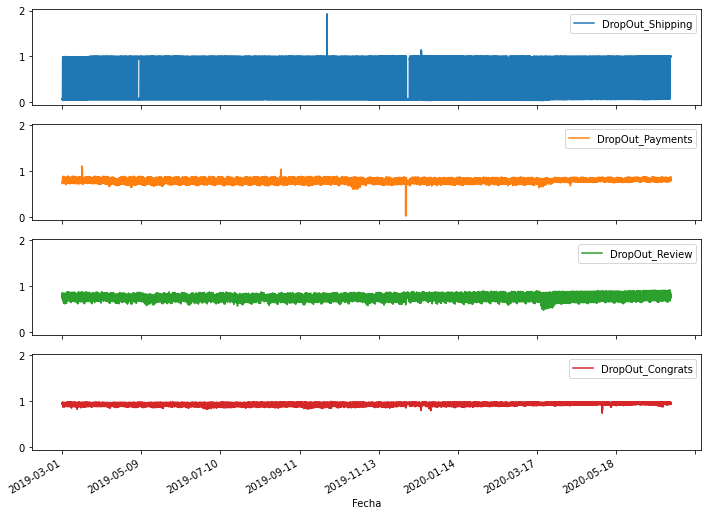

In [ ]:
td_Conversion.plot(x="Fecha", subplots=True,sharey=True)

Para DropOut Shipping nos encontramos con dos distribuciones. Una para el flow chart y otra para Direct. Esto implica que no podemos imputar por la mediana de la distribución total sino que debemos imputar según el flow

Abajo podemos ver que hay valores mayores a uno. Estos los vamos a imputar con la mediana


In [ ]:
td_Conversion.describe()

,DropOut_Shipping,DropOut_Payments,DropOut_Review,DropOut_Congrats
count,7656.000000,7664.000000,7660.000000,7660.000000
mean,0.738053,0.792946,0.756807,0.935774
std,0.396301,0.053109,0.061703,0.028147
min,0.029290,0.023620,0.476270,0.734371
25%,0.104962,0.758795,0.719358,0.919935
50%,0.954811,0.797944,0.762400,0.935941
75%,0.988430,0.831808,0.797862,0.954194
max,1.926777,1.114768,0.918142,0.997568


Si bien son muchos valores mayores a uno, solo 3 representan verdaderos outliers que debemos corregir

En este gráfico podemos ver que para el dia 3 de Octubre se disparan los valores de todas las variables menos Loading (Celeste). Es probable que haya habíado un evento espcial y el proceso que colecta los datos de Loading no haya estado funcionando correctamente. Por lo que vamos a imputar ese dia a un valor que de una conversión del 74% que es la media

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f132a682310>,
      dtype=object)

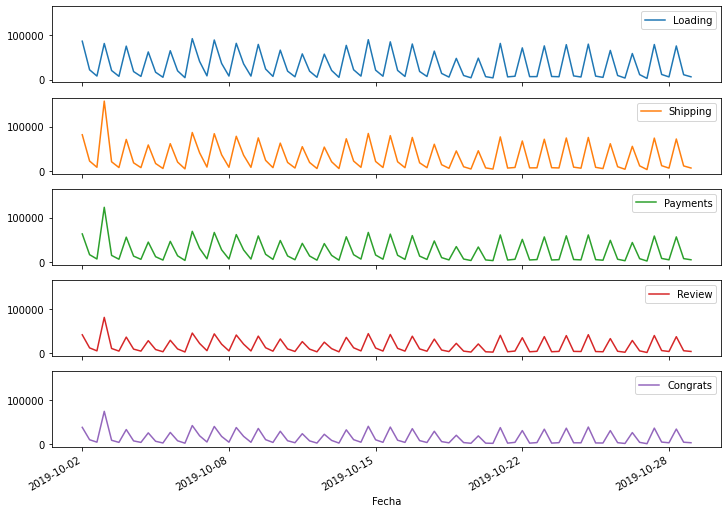

In [ ]:
td_Oct = td.loc[(td["flow"]=="direct") & (td["Device"]=="Mobile") & (td["Fecha"]>"2019-10-01")&(td["Fecha"]<"2019-10-30"),["Fecha","Loading",	"Shipping",	"Payments",	"Review",	"Congrats"]]
td_Oct.plot(x="Fecha",subplots=True,sharey=True)

Imputamos Loading con el valor de la media y volvemos a graficar  comprobando que ahora loading tiene un pico similar a Shipping, payments y review

In [ ]:
Loading_3_Oct = td.at[3350,"Shipping"]/.74
td.iloc[3350,td.columns.get_loc("Loading")]=Loading_3_Oct.round(0)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f132a4f6190>,
      dtype=object)

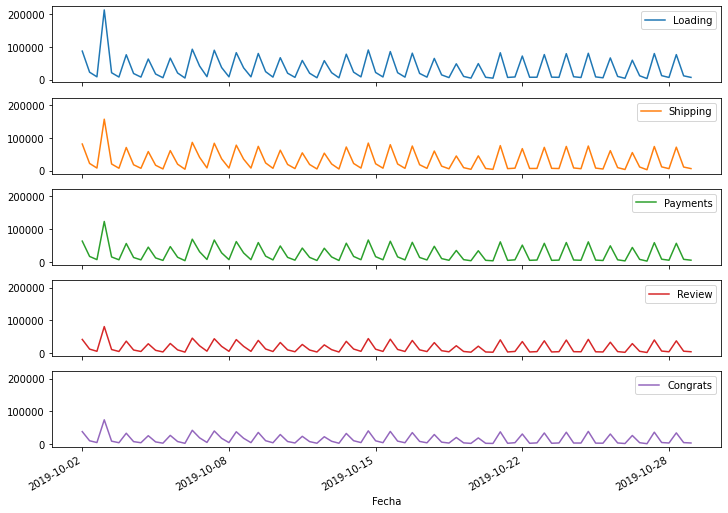

In [ ]:
td_Oct = td.loc[(td["flow"]=="direct") & (td["Device"]=="Mobile") & (td["Fecha"]>"2019-10-01")&(td["Fecha"]<"2019-10-30"),["Fecha","Loading",	"Shipping",	"Payments",	"Review",	"Congrats"]]
td_Oct.plot(x="Fecha",subplots=True,sharey=True)


 Abajo se oservan valores anómalos en el índice de DropOut_Payments en los primeros días (Grafico Amarillo)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f132a2f7550>,
      dtype=object)

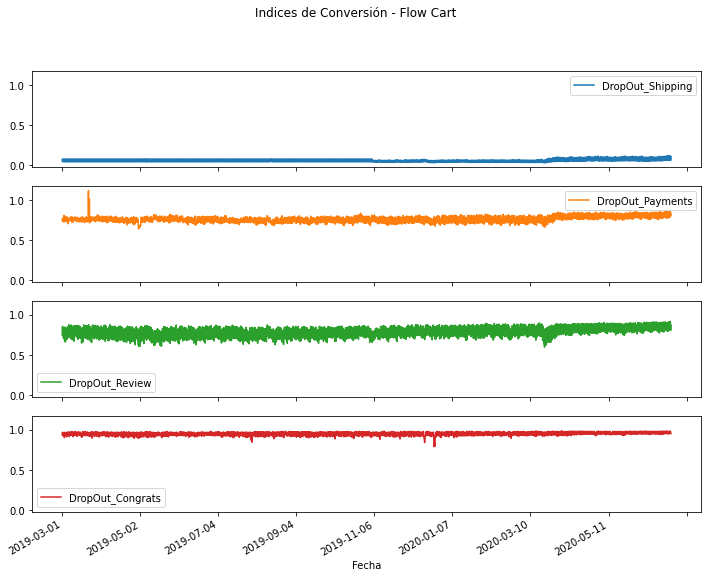

In [ ]:
#Recalculamos las metricas de Drop Out para ver como quedan los datos después de la imputación
td["DropOut_Shipping"]= td["Shipping"]/td["Loading"]
td["DropOut_Payments"]= td["Payments"]/td["Shipping"]
td["DropOut_Review"]= td["Review"]/td["Payments"]
td["DropOut_Congrats"]= td["Congrats"]/td["Review"]
#Recalculamos conversion Plot Cart
td_Conversion_Cart = td.loc[td["flow"]=="cart",["Fecha","flow","DropOut_Shipping","DropOut_Payments","DropOut_Review","DropOut_Congrats"]]
td_Conversion.set_index("Fecha")
#Ploteamos nuevamente para ver como quedaron las distribuciones
td_Conversion_Cart.plot(x="Fecha", subplots=True,sharey=True,title="Indices de Conversión - Flow Cart")


In [ ]:
#Filtramos los dos registros que están fuera del rango
Quantile99Cart = td_Conversion_Cart["DropOut_Payments"].quantile(.999)
td.loc[(td["DropOut_Payments"]>Quantile99Cart)&(td["flow"]=="cart"),:]

,Fecha,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats,NAN,Conv_Loading,DropOut_Shipping,DropOut_Payments,DropOut_Review,DropOut_Congrats
252,2019-03-22,cart,MLA,Android,138598.0,7990.0,8907.0,NaN,4044.0,1,NaN,0.057649,1.114768,NaN,NaN
255,2019-03-22,cart,MLA,iOS,21584.0,1436.0,1455.0,NaN,763.0,1,NaN,0.066531,1.013231,NaN,NaN


In [ ]:
#Calculamos los valores del mismo dia de la semana anterior para Android
Payments_Semana_ant = td.loc[(td['Site']=="MLA")&(td["flow"]=="cart")&(td["Device"]=="Android")&(td["Fecha"]=="2019-03-15"),'Payments']
Shipping_Semana_ant= td.loc[(td['Site']=="MLA")&(td["flow"]=="cart")&(td["Device"]=="Android")&(td["Fecha"]=="2019-03-15"),'Shipping']
print(Payments_Semana_ant)
print(Shipping_Semana_ant)

168    5504.0
Name: Payments, dtype: float64
168    7446.0
Name: Shipping, dtype: float64


In [ ]:
#Imputamos los valores del registro 252
#td.iloc[3350,td.columns.get_loc("Loading")]=Loading_3_Oct.round(0)
td.iloc[252,td.columns.get_loc("Payments")]=5504
td.iloc[252,td.columns.get_loc("Shipping")]=7446
#Recalculamos las metricas de Drop Out 
td["DropOut_Payments"]= td["Payments"]/td["Shipping"]


In [ ]:
#Calculamos los valores del mismo dia de la semana anterior para iOS
Payments_Semana_ant = td.loc[(td['Site']=="MLA")&(td["flow"]=="cart")&(td["Device"]=="iOS")&(td["Fecha"]=="2019-03-15"),'Payments']
Shipping_Semana_ant= td.loc[(td['Site']=="MLA")&(td["flow"]=="cart")&(td["Device"]=="iOS")&(td["Fecha"]=="2019-03-15"),'Shipping']
print(Payments_Semana_ant)
print(Shipping_Semana_ant)



171    972.0
Name: Payments, dtype: float64
171    1326.0
Name: Shipping, dtype: float64


In [ ]:
#Imputamos los valores del registro 255
#td.iloc[3350,td.columns.get_loc("Loading")]=Loading_3_Oct.round(0)
td.iloc[255,td.columns.get_loc("Payments")]=972
td.iloc[255,td.columns.get_loc("Shipping")]=1326
#Recalculamos las metricas de Drop Out 
td["DropOut_Payments"]= td["Payments"]/td["Shipping"]

En este grafico puede notarse que no quedan registros anómalos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f132c259d50>,
      dtype=object)

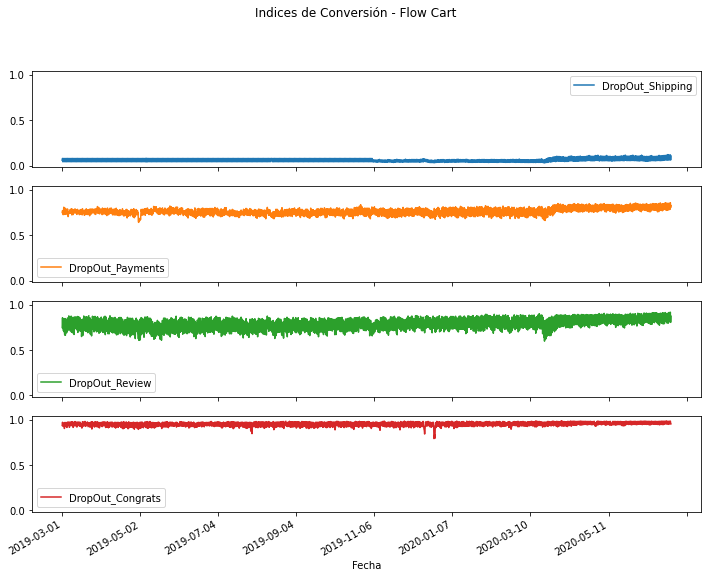

In [ ]:
#Recalculamos conversion Plot Cart
td_Conversion_Cart = td.loc[td["flow"]=="cart",["Fecha","flow","DropOut_Shipping","DropOut_Payments","DropOut_Review","DropOut_Congrats"]]
td_Conversion.set_index("Fecha")
#Ploteamos nuevamente para ver como quedaron las distribuciones
td_Conversion_Cart.plot(x="Fecha", subplots=True,sharey=True,title="Indices de Conversión - Flow Cart")


De la misma forma que hicimos para Cart vamos a hacer para el flow Direct. Puede notarse una anomalía clara en Drop_Out_Payments  en la mitad de la serie amrilla

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1329fd99d0>,
      dtype=object)

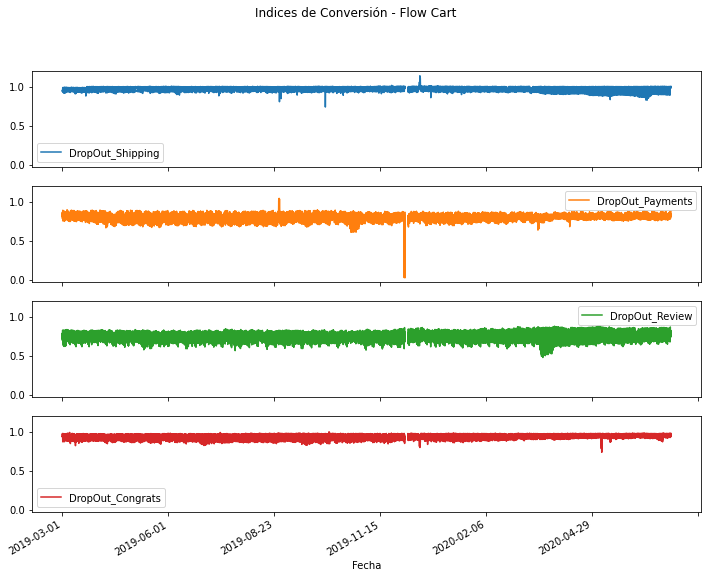

In [ ]:

td_Conversion_Direct = td.loc[td["flow"]=="direct",["Fecha","flow","DropOut_Shipping","DropOut_Payments","DropOut_Review","DropOut_Congrats"]]
td_Conversion.set_index("Fecha")
#Ploteamos nuevamente para ver como quedaron las distribuciones
td_Conversion_Direct.plot(x="Fecha", subplots=True,sharey=True,title="Indices de Conversión - Flow Cart")


In [ ]:
#### Filtramos los registros con anomalías en payments. Son 6 registros el día 4 de diciembre
#Justificar porque tomamos 0.5 en lugar de el quantile 0.01

td.loc[(td["DropOut_Payments"]<.5)&(td["flow"]=="direct"),:]

,Fecha,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats,NAN,Conv_Loading,DropOut_Shipping,DropOut_Payments,DropOut_Review,DropOut_Congrats
4341,2019-12-04,direct,MLA,Desktop,146932.0,138124.0,3823.0,2597.0,2538.0,0,0.940054,0.940054,0.027678,0.679309,0.977281
4342,2019-12-04,direct,MLA,Mobile,90612.0,85284.0,5254.0,3096.0,2682.0,0,0.941200,0.941200,0.061606,0.589265,0.866279
4345,2019-12-04,direct,MLC,Desktop,32311.0,32135.0,1223.0,1052.0,1013.0,0,0.994553,0.994553,0.038058,0.860180,0.962928
4346,2019-12-04,direct,MLC,Mobile,27843.0,27457.0,1736.0,1245.0,1056.0,0,0.986137,0.986137,0.063226,0.717166,0.848193
4349,2019-12-04,direct,MLU,Desktop,8740.0,8679.0,205.0,149.0,140.0,0,0.993021,0.993021,0.023620,0.726829,0.939597
4350,2019-12-04,direct,MLU,Mobile,9456.0,9338.0,375.0,254.0,231.0,0,0.987521,0.987521,0.040158,0.677333,0.909449


In [ ]:
### Ploteamos los valores de Shipping y Payments para determinar donde se encuentra el valor erróneo
td_Anomalies = td.loc[(td["Fecha"]>"2019-12-01") &
                             (td["Fecha"]<"2019-12-31"),["Fecha",	"Loading","Shipping",	"Payments","Review","Congrats"]]
td_Anomalies_GB = td_Anomalies.groupby("Fecha")["Loading","Shipping",	"Payments","Congrats", "Review"].sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


Abajo puede verse que el día 4 de Diciembre Shipping se quiebran las relaciones entre las variables.Payments y congrats caen significativamente mientras que Shipping se mantiene constante. Los días 5 y 6 no hay valores y la serie se recompone el dia 8 de Diciembre. Esto hace pensar que el dia 4 a partir de algún momento los datos no fueron colectados correctamente y por lo tanto los valores de ese dia son inválidos. Por esa razón vamos a imputarlos con NAN y posteriormente vamos a imputar la serie a partir del dia 4 inclusive



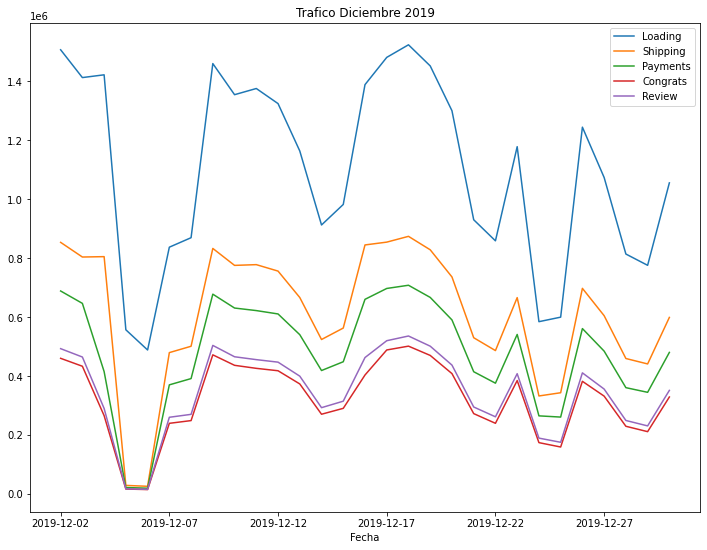

In [ ]:
td_Anomalies_GB.plot(title="Trafico Diciembre 2019")

In [ ]:

td.loc[(td["Fecha"] >= '2019-12-04')&(td["Fecha"] <= '2019-12-08'), ["Loading","Shipping","Payments", "Review","Congrats"]] = np.nan


Reprocesamos las métricas y graficamos nuevamente comprobando que ya no tenemos los valores anómalos en DropOut_Payment

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1329d96ed0>,
      dtype=object)

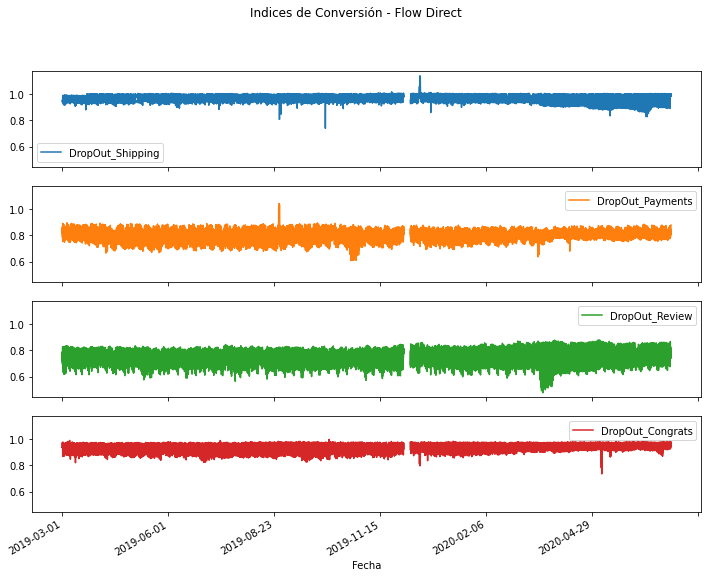

In [ ]:
#Recalculamos las metricas de Drop Out para ver como quedan los datos después de la imputación
td["DropOut_Shipping"]= td["Shipping"]/td["Loading"]
td["DropOut_Payments"]= td["Payments"]/td["Shipping"]
td["DropOut_Review"]= td["Review"]/td["Payments"]
td["DropOut_Congrats"]= td["Congrats"]/td["Review"]

#Recalculamos conversion Plot Cart
td_Conversion_Cart = td.loc[td["flow"]=="direct",["Fecha","flow","DropOut_Shipping","DropOut_Payments","DropOut_Review","DropOut_Congrats"]]
td_Conversion.set_index("Fecha")

#Ploteamos nuevamente para ver como quedaron las distribuciones
td_Conversion_Cart.plot(x="Fecha", subplots=True,sharey=True,title="Indices de Conversión - Flow Direct")


#### Imputación de valores faltantes
Como puede apreciarse en la gráfica de arriba todavía quedan ciertos blancos que representan datos faltantes. En esta sección vamos a imputarlos en base a la técnica de interpolación

# Nueva sección

In [ ]:
#Limpiamos el dataframe y contamos los NAN
Cols = ["NAN","Conv_Loading","DropOut_Shipping","DropOut_Payments","DropOut_Review","DropOut_Congrats"]
td.drop(Cols, axis = 1,inplace=True)
td.isna().sum()

Fecha        0
flow         0
Site         0
Device       0
Loading     90
Shipping    88
Payments    80
Review      92
Congrats    80
dtype: int64

In [ ]:
#Imputación del flow cart
td.loc[(td["flow"]=="cart")&(td['Site']=="MLA")&(td["Device"]=="Android"),
       ColumnasNum]=td.loc[(td["flow"]=="cart")&(td['Site']=="MLA")&(td["Device"]=="Android"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="cart")&(td['Site']=="MLA")&(td["Device"]=="Desktop"),
       ColumnasNum]=td.loc[(td["flow"]=="cart")&(td['Site']=="MLA")&(td["Device"]=="Desktop"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="cart")&(td['Site']=="MLA")&(td["Device"]=="Mobile"),
       ColumnasNum]=td.loc[(td["flow"]=="cart")&(td['Site']=="MLA")&(td["Device"]=="Mobile"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="cart")&(td['Site']=="MLA")&(td["Device"]=="iOS"),
       ColumnasNum]=td.loc[(td["flow"]=="cart")&(td['Site']=="MLA")&(td["Device"]=="iOS"),
                           ColumnasNum].interpolate()


td.loc[(td["flow"]=="cart")&(td['Site']=="MLU")&(td["Device"]=="Android"),
       ColumnasNum]=td.loc[(td["flow"]=="cart")&(td['Site']=="MLU")&(td["Device"]=="Android"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="cart")&(td['Site']=="MLU")&(td["Device"]=="Desktop"),
       ColumnasNum]=td.loc[(td["flow"]=="cart")&(td['Site']=="MLU")&(td["Device"]=="Desktop"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="cart")&(td['Site']=="MLU")&(td["Device"]=="Mobile"),
       ColumnasNum]=td.loc[(td["flow"]=="cart")&(td['Site']=="MLU")&(td["Device"]=="Mobile"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="cart")&(td['Site']=="MLU")&(td["Device"]=="iOS"),
       ColumnasNum]=td.loc[(td["flow"]=="cart")&(td['Site']=="MLU")&(td["Device"]=="iOS"),
                           ColumnasNum].interpolate()


td.loc[(td["flow"]=="cart")&(td['Site']=="MLC")&(td["Device"]=="Android"),
       ColumnasNum]=td.loc[(td["flow"]=="cart")&(td['Site']=="MLC")&(td["Device"]=="Android"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="cart")&(td['Site']=="MLC")&(td["Device"]=="Desktop"),
       ColumnasNum]=td.loc[(td["flow"]=="cart")&(td['Site']=="MLC")&(td["Device"]=="Desktop"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="cart")&(td['Site']=="MLC")&(td["Device"]=="Mobile"),
       ColumnasNum]=td.loc[(td["flow"]=="cart")&(td['Site']=="MLC")&(td["Device"]=="Mobile"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="cart")&(td['Site']=="MLC")&(td["Device"]=="iOS"),
       ColumnasNum]=td.loc[(td["flow"]=="cart")&(td['Site']=="MLC")&(td["Device"]=="iOS"),
                           ColumnasNum].interpolate()






In [ ]:
#Imputación flow direct
td.loc[(td["flow"]=="direct")&(td['Site']=="MLA")&(td["Device"]=="Android"),
       ColumnasNum]=td.loc[(td["flow"]=="direct")&(td['Site']=="MLA")&(td["Device"]=="Android"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="direct")&(td['Site']=="MLA")&(td["Device"]=="Desktop"),
       ColumnasNum]=td.loc[(td["flow"]=="direct")&(td['Site']=="MLA")&(td["Device"]=="Desktop"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="direct")&(td['Site']=="MLA")&(td["Device"]=="Mobile"),
       ColumnasNum]=td.loc[(td["flow"]=="direct")&(td['Site']=="MLA")&(td["Device"]=="Mobile"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="direct")&(td['Site']=="MLA")&(td["Device"]=="iOS"),
       ColumnasNum]=td.loc[(td["flow"]=="direct")&(td['Site']=="MLA")&(td["Device"]=="iOS"),
                           ColumnasNum].interpolate()


td.loc[(td["flow"]=="direct")&(td['Site']=="MLU")&(td["Device"]=="Android"),
       ColumnasNum]=td.loc[(td["flow"]=="direct")&(td['Site']=="MLU")&(td["Device"]=="Android"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="direct")&(td['Site']=="MLU")&(td["Device"]=="Desktop"),
       ColumnasNum]=td.loc[(td["flow"]=="direct")&(td['Site']=="MLU")&(td["Device"]=="Desktop"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="direct")&(td['Site']=="MLU")&(td["Device"]=="Mobile"),
       ColumnasNum]=td.loc[(td["flow"]=="direct")&(td['Site']=="MLU")&(td["Device"]=="Mobile"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="direct")&(td['Site']=="MLU")&(td["Device"]=="iOS"),
       ColumnasNum]=td.loc[(td["flow"]=="direct")&(td['Site']=="MLU")&(td["Device"]=="iOS"),
                           ColumnasNum].interpolate()


td.loc[(td["flow"]=="direct")&(td['Site']=="MLC")&(td["Device"]=="Android"),
       ColumnasNum]=td.loc[(td["flow"]=="direct")&(td['Site']=="MLC")&(td["Device"]=="Android"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="direct")&(td['Site']=="MLC")&(td["Device"]=="Desktop"),
       ColumnasNum]=td.loc[(td["flow"]=="direct")&(td['Site']=="MLC")&(td["Device"]=="Desktop"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="direct")&(td['Site']=="MLC")&(td["Device"]=="Mobile"),
       ColumnasNum]=td.loc[(td["flow"]=="direct")&(td['Site']=="MLC")&(td["Device"]=="Mobile"),
                           ColumnasNum].interpolate()

td.loc[(td["flow"]=="direct")&(td['Site']=="MLC")&(td["Device"]=="iOS"),
       ColumnasNum]=td.loc[(td["flow"]=="direct")&(td['Site']=="MLC")&(td["Device"]=="iOS"),
                           ColumnasNum].interpolate()


Abajo podemos ver que han quedado todos los NAN imputados

In [ ]:
td.isna().sum()

Fecha       0
flow        0
Site        0
Device      0
Loading     0
Shipping    0
Payments    0
Review      0
Congrats    0
dtype: int64

Aca vemos como queda imputado el mes de diciembre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


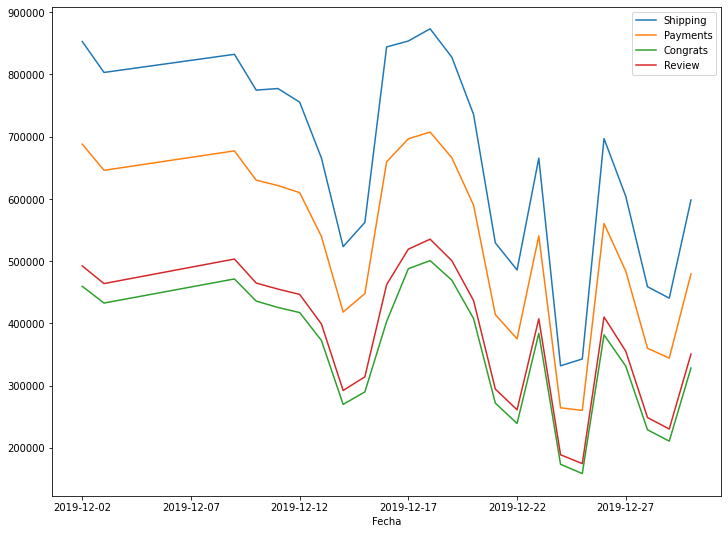

In [ ]:
December = td.loc[(td["Fecha"]>"2019-12-01") &
                             (td["Fecha"]<"2019-12-31"),["Fecha","Shipping","Payments","Congrats","Review"]]
DecemberGB = December.groupby("Fecha")["Shipping","Payments","Congrats","Review"].sum()                             

DecemberGB.plot()

Abajo podemos notar que los índices de conversión ya no tienen blancos

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1329b27990>,
      dtype=object)

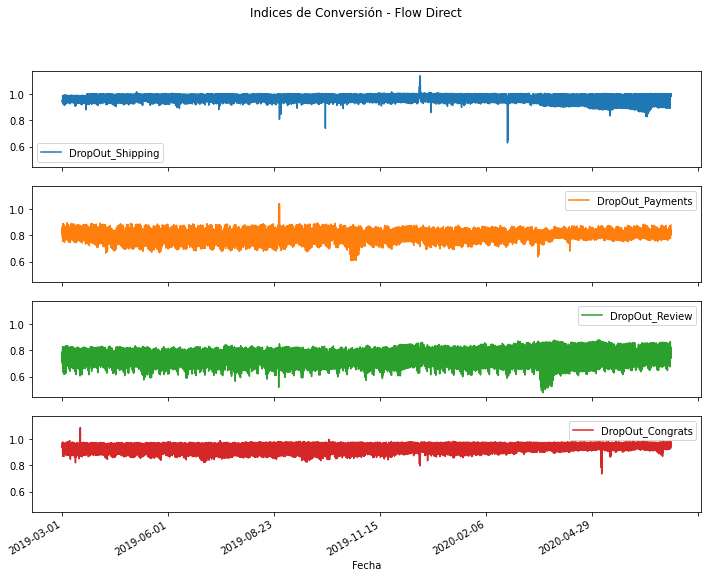

In [ ]:
#Recalculamos las metricas de Drop Out para ver como quedan los datos después de la imputación
td["DropOut_Shipping"]= td["Shipping"]/td["Loading"]
td["DropOut_Payments"]= td["Payments"]/td["Shipping"]
td["DropOut_Review"]= td["Review"]/td["Payments"]
td["DropOut_Congrats"]= td["Congrats"]/td["Review"]

#Recalculamos conversion Plot direct
td_Conversion_Cart = td.loc[td["flow"]=="direct",["Fecha","flow","DropOut_Shipping","DropOut_Payments","DropOut_Review","DropOut_Congrats"]]
td_Conversion.set_index("Fecha")

#Ploteamos nuevamente para ver como quedaron las distribuciones
td_Conversion_Cart.plot(x="Fecha", subplots=True,sharey=True,title="Indices de Conversión - Flow Direct")


In [ ]:
import numpy as np
np.corrcoef(td["Loading"],td['Payments'])

#pd.plotting.autocorrelation_plot(td)

array([[1.        , 0.67899847],
       [0.67899847, 1.        ]])

Los coeficientes de correlación empeoraron después de las imputaciones :-(

In [ ]:
td.corr()

,Loading,Shipping,Payments,Review,Congrats,DropOut_Shipping,DropOut_Payments,DropOut_Review,DropOut_Congrats
Loading,1.000000,0.681287,0.678998,0.675687,0.673939,-0.320843,-0.123803,-0.225261,0.046573
Shipping,0.681287,1.000000,0.999456,0.994293,0.991269,0.259033,0.145785,-0.409125,-0.079367
Payments,0.678998,0.999456,1.000000,0.996582,0.994232,0.259159,0.164629,-0.395047,-0.063329
Review,0.675687,0.994293,0.996582,1.000000,0.999526,0.265194,0.187764,-0.354047,-0.034815
Congrats,0.673939,0.991269,0.994232,0.999526,1.000000,0.264769,0.196735,-0.344063,-0.017439
DropOut_Shipping,-0.320843,0.259033,0.259159,0.265194,0.264769,1.000000,0.432019,-0.169772,-0.206789
DropOut_Payments,-0.123803,0.145785,0.164629,0.187764,0.196735,0.432019,1.000000,0.371754,0.506394
DropOut_Review,-0.225261,-0.409125,-0.395047,-0.354047,-0.344063,-0.169772,0.371754,1.000000,0.496914
DropOut_Congrats,0.046573,-0.079367,-0.063329,-0.034815,-0.017439,-0.206789,0.506394,0.496914,1.000000


In [ ]:
td_original.corr()

,Loading,Shipping,Payments,Review,Congrats
Loading,1.000000,0.741516,0.739813,0.738543,0.737274
Shipping,0.741516,1.000000,0.999099,0.993936,0.990923
Payments,0.739813,0.999099,1.000000,0.996598,0.994253
Review,0.738543,0.993936,0.996598,1.000000,0.999536
Congrats,0.737274,0.990923,0.994253,0.999536,1.000000
